In [1]:
#pip install seaborn

In [1]:
## Import modules / lib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from scipy.interpolate import splrep, splev

In [2]:
## check installed modules
##help('modules')

In [3]:
# import DataFrame_Countries_Continents

col_names = ['Area', 'Continent', 'Continent_Code']

url = 'C:/Users/Ula/Documents/InfoShareAcademy/PROJEKT_2/jdszr12-git_squad/py_projekt'
Countries_Continents = pd.read_csv(url + '/_Countries_Continents.csv', 
                names = col_names,
                header = None,
                index_col = None)
Countries_Continents

,Area,Continent,Continent_Code
0,Afghanistan,Asia,2
1,Albania,Europe,3
2,Algeria,Africa,1
3,American Samoa,Oceania,5
4,Andorra,Europe,3
...,...,...,...
242,Western Sahara,Africa,1
243,Yemen,Asia,2
244,Yugoslav SFR,Europe,3
245,Zambia,Africa,1


In [4]:
Countries_Continents.columns

Index(['Area', 'Continent', 'Continent_Code'], dtype='object')

In [5]:
# import DataFrame Environment_Temperature_change_E_All_Data_NOFLAG

url = 'C:/Users/Ula/Documents/InfoShareAcademy/PROJEKT_2/jdszr12-git_squad/py_projekt'

Temperature = pd.read_csv(url + '/Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding="Windows-1250")
Temperature

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,5873,OECD,7018,Jun–Jul–Aug,6078,Standard Deviation,°C,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,5873,OECD,7019,Sep–Oct–Nov,7271,Temperature change,°C,0.036,0.461,0.665,...,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233
9653,5873,OECD,7019,Sep–Oct–Nov,6078,Standard Deviation,°C,0.378,0.378,0.378,...,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378
9654,5873,OECD,7020,Meteorological year,7271,Temperature change,°C,0.165,-0.009,0.134,...,1.246,0.805,1.274,0.991,0.811,1.282,1.850,1.349,1.088,1.297


In [6]:
#Temperature.shape

In [7]:
#Temperature.columns

In [8]:
Temperature = Temperature.rename(columns={"Area Code": "Area_Code",
                                          "Months Code": "Months_Code", 
                                          "Element Code": "Element_Code"})
Temperature['Area'] = Temperature['Area'].str.replace('\"', '')
Temperature

,Area_Code,Area,Months_Code,Months,Element_Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,5873,OECD,7018,Jun–Jul–Aug,6078,Standard Deviation,°C,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,5873,OECD,7019,Sep–Oct–Nov,7271,Temperature change,°C,0.036,0.461,0.665,...,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233
9653,5873,OECD,7019,Sep–Oct–Nov,6078,Standard Deviation,°C,0.378,0.378,0.378,...,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378
9654,5873,OECD,7020,Meteorological year,7271,Temperature change,°C,0.165,-0.009,0.134,...,1.246,0.805,1.274,0.991,0.811,1.282,1.850,1.349,1.088,1.297


In [9]:
#Temperature.info()

In [10]:
df = pd.merge(left=Countries_Continents, right=Temperature, on='Area', how='outer')
df

,Area,Continent,Continent_Code,Area_Code,Months_Code,Months,Element_Code,Element,Unit,Y1961,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Afghanistan,Asia,2.0,2,7001,January,7271,Temperature change,°C,0.777,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,Afghanistan,Asia,2.0,2,7001,January,6078,Standard Deviation,°C,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,Afghanistan,Asia,2.0,2,7002,February,7271,Temperature change,°C,-1.743,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,Afghanistan,Asia,2.0,2,7002,February,6078,Standard Deviation,°C,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,Afghanistan,Asia,2.0,2,7003,March,7271,Temperature change,°C,0.516,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,OECD,NaN,NaN,5873,7018,Jun–Jul–Aug,6078,Standard Deviation,°C,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,OECD,NaN,NaN,5873,7019,Sep–Oct–Nov,7271,Temperature change,°C,0.036,...,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233
9653,OECD,NaN,NaN,5873,7019,Sep–Oct–Nov,6078,Standard Deviation,°C,0.378,...,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378
9654,OECD,NaN,NaN,5873,7020,Meteorological year,7271,Temperature change,°C,0.165,...,1.246,0.805,1.274,0.991,0.811,1.282,1.850,1.349,1.088,1.297


In [11]:
df.to_csv('Temperature2_csv', index=False)

In [12]:
null_mask = df['Continent'].isnull().sum()
print(null_mask)

1258


In [13]:
Oceania = df[df.Continent == "Oceania"]
Oceania

,Area,Continent,Continent_Code,Area_Code,Months_Code,Months,Element_Code,Element,Unit,Y1961,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
102,American Samoa,Oceania,5.0,5,7001,January,7271,Temperature change,°C,0.565,...,3.010,0.379,0.843,0.534,0.553,0.993,1.863,1.713,0.763,1.513
103,American Samoa,Oceania,5.0,5,7001,January,6078,Standard Deviation,°C,0.429,...,0.429,0.429,0.429,0.429,0.429,0.429,0.429,0.429,0.429,0.429
104,American Samoa,Oceania,5.0,5,7002,February,7271,Temperature change,°C,0.261,...,1.015,-0.098,0.702,1.182,1.466,1.526,2.606,0.806,0.956,1.506
105,American Samoa,Oceania,5.0,5,7002,February,6078,Standard Deviation,°C,0.488,...,0.488,0.488,0.488,0.488,0.488,0.488,0.488,0.488,0.488,0.488
106,American Samoa,Oceania,5.0,5,7003,March,7271,Temperature change,°C,-0.831,...,1.171,0.620,0.320,1.020,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8223,Wallis and Futuna Islands,Oceania,5.0,243,7018,Jun–Jul–Aug,6078,Standard Deviation,°C,0.308,...,0.308,0.308,0.308,0.308,0.308,0.308,0.308,0.308,0.308,0.308
8224,Wallis and Futuna Islands,Oceania,5.0,243,7019,Sep–Oct–Nov,7271,Temperature change,°C,-0.112,...,1.052,0.984,1.253,0.751,1.022,0.823,1.450,1.227,1.506,1.041
8225,Wallis and Futuna Islands,Oceania,5.0,243,7019,Sep–Oct–Nov,6078,Standard Deviation,°C,0.324,...,0.324,0.324,0.324,0.324,0.324,0.324,0.324,0.324,0.324,0.324
8226,Wallis and Futuna Islands,Oceania,5.0,243,7020,Meteorological year,7271,Temperature change,°C,0.317,...,0.992,0.919,0.865,0.943,0.903,0.901,1.471,1.174,0.998,1.245


In [14]:
#Oceania.to_csv('Australia_csv', index=False)

In [15]:
Oceania['Area'].unique()

array(['American Samoa', 'Australia', 'Cook Islands', 'Fiji',
       'French Polynesia', 'Kiribati', 'Marshall Islands',
       'Micronesia (Federated States of)', 'Midway Island', 'Nauru',
       'New Caledonia', 'New Zealand', 'Niue', 'Norfolk Island',
       'Pacific Islands Trust Territory', 'Palau', 'Papua New Guinea',
       'Pitcairn Islands', 'Samoa', 'Solomon Islands', 'Tokelau', 'Tonga',
       'Tuvalu', 'Vanuatu', 'Wake Island', 'Wallis and Futuna Islands'],
      dtype=object)

In [16]:
Oceania = Oceania.melt(id_vars = ['Area', 'Continent', 'Continent_Code', 'Area_Code', 'Months_Code', 'Months', 'Element_Code',
                                  'Element', 'Unit'], 
                       var_name = 'Year', 
                       value_name ='Temp_change')
Oceania

,Area,Continent,Continent_Code,Area_Code,Months_Code,Months,Element_Code,Element,Unit,Year,Temp_change
0,American Samoa,Oceania,5.0,5,7001,January,7271,Temperature change,°C,Y1961,0.565
1,American Samoa,Oceania,5.0,5,7001,January,6078,Standard Deviation,°C,Y1961,0.429
2,American Samoa,Oceania,5.0,5,7002,February,7271,Temperature change,°C,Y1961,0.261
3,American Samoa,Oceania,5.0,5,7002,February,6078,Standard Deviation,°C,Y1961,0.488
4,American Samoa,Oceania,5.0,5,7003,March,7271,Temperature change,°C,Y1961,-0.831
...,...,...,...,...,...,...,...,...,...,...,...
52151,Wallis and Futuna Islands,Oceania,5.0,243,7018,Jun–Jul–Aug,6078,Standard Deviation,°C,Y2019,0.308
52152,Wallis and Futuna Islands,Oceania,5.0,243,7019,Sep–Oct–Nov,7271,Temperature change,°C,Y2019,1.041
52153,Wallis and Futuna Islands,Oceania,5.0,243,7019,Sep–Oct–Nov,6078,Standard Deviation,°C,Y2019,0.324
52154,Wallis and Futuna Islands,Oceania,5.0,243,7020,Meteorological year,7271,Temperature change,°C,Y2019,1.245


In [17]:
Oceania = Oceania.loc[(Oceania['Months_Code'] == 7020) & (Oceania['Element_Code'] == 7271) & (Oceania['Months_Code'] == 7020)]
Oceania

,Area,Continent,Continent_Code,Area_Code,Months_Code,Months,Element_Code,Element,Unit,Year,Temp_change
32,American Samoa,Oceania,5.0,5,7020,Meteorological year,7271,Temperature change,°C,Y1961,-0.014
66,Australia,Oceania,5.0,10,7020,Meteorological year,7271,Temperature change,°C,Y1961,0.151
100,Cook Islands,Oceania,5.0,47,7020,Meteorological year,7271,Temperature change,°C,Y1961,0.040
134,Fiji,Oceania,5.0,66,7020,Meteorological year,7271,Temperature change,°C,Y1961,0.215
168,French Polynesia,Oceania,5.0,70,7020,Meteorological year,7271,Temperature change,°C,Y1961,0.072
...,...,...,...,...,...,...,...,...,...,...,...
52018,Tonga,Oceania,5.0,219,7020,Meteorological year,7271,Temperature change,°C,Y2019,1.904
52052,Tuvalu,Oceania,5.0,227,7020,Meteorological year,7271,Temperature change,°C,Y2019,1.179
52086,Vanuatu,Oceania,5.0,155,7020,Meteorological year,7271,Temperature change,°C,Y2019,1.056
52120,Wake Island,Oceania,5.0,242,7020,Meteorological year,7271,Temperature change,°C,Y2019,NaN


In [18]:
Oceania["Year"] = Oceania["Year"].apply(lambda x: x.replace("Y", ""))
Oceania

C:\Users\Ula\AppData\Local\Temp\ipykernel_3324\3946677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Oceania["Year"] = Oceania["Year"].apply(lambda x: x.replace("Y", ""))


,Area,Continent,Continent_Code,Area_Code,Months_Code,Months,Element_Code,Element,Unit,Year,Temp_change
32,American Samoa,Oceania,5.0,5,7020,Meteorological year,7271,Temperature change,°C,1961,-0.014
66,Australia,Oceania,5.0,10,7020,Meteorological year,7271,Temperature change,°C,1961,0.151
100,Cook Islands,Oceania,5.0,47,7020,Meteorological year,7271,Temperature change,°C,1961,0.040
134,Fiji,Oceania,5.0,66,7020,Meteorological year,7271,Temperature change,°C,1961,0.215
168,French Polynesia,Oceania,5.0,70,7020,Meteorological year,7271,Temperature change,°C,1961,0.072
...,...,...,...,...,...,...,...,...,...,...,...
52018,Tonga,Oceania,5.0,219,7020,Meteorological year,7271,Temperature change,°C,2019,1.904
52052,Tuvalu,Oceania,5.0,227,7020,Meteorological year,7271,Temperature change,°C,2019,1.179
52086,Vanuatu,Oceania,5.0,155,7020,Meteorological year,7271,Temperature change,°C,2019,1.056
52120,Wake Island,Oceania,5.0,242,7020,Meteorological year,7271,Temperature change,°C,2019,NaN


In [19]:
Oceania.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1534 entries, 32 to 52154
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            1534 non-null   object 
 1   Continent       1534 non-null   object 
 2   Continent_Code  1534 non-null   float64
 3   Area_Code       1534 non-null   int64  
 4   Months_Code     1534 non-null   int64  
 5   Months          1534 non-null   object 
 6   Element_Code    1534 non-null   int64  
 7   Element         1534 non-null   object 
 8   Unit            1534 non-null   object 
 9   Year            1534 non-null   object 
 10  Temp_change     1224 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 143.8+ KB


In [20]:
Oceania["Year"] = Oceania["Year"].astype("float")
Oceania.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1534 entries, 32 to 52154
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            1534 non-null   object 
 1   Continent       1534 non-null   object 
 2   Continent_Code  1534 non-null   float64
 3   Area_Code       1534 non-null   int64  
 4   Months_Code     1534 non-null   int64  
 5   Months          1534 non-null   object 
 6   Element_Code    1534 non-null   int64  
 7   Element         1534 non-null   object 
 8   Unit            1534 non-null   object 
 9   Year            1534 non-null   float64
 10  Temp_change     1224 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 143.8+ KB


C:\Users\Ula\AppData\Local\Temp\ipykernel_3324\987591800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Oceania["Year"] = Oceania["Year"].astype("float")


In [21]:
url = 'C:/Users/Ula/Documents/InfoShareAcademy/PROJEKT_2/jdszr12-git_squad/py_projekt'
CO2 = pd.read_csv(url + '/co2.csv')
CO2['CO2'] = round((CO2.value/1000),2)
CO2 = CO2.rename(columns={'country_name':'Area', 'year':'Year'})
del CO2['country_code']
del CO2['value']
CO2

,Area,Year,CO2
0,Aruba,1960,11.09
1,Aruba,1961,11.58
2,Aruba,1962,12.71
3,Aruba,1963,12.18
4,Aruba,1964,11.84
...,...,...,...
13948,Zimbabwe,2015,12.43
13949,Zimbabwe,2016,11.02
13950,Zimbabwe,2017,10.34
13951,Zimbabwe,2018,12.38


In [22]:
#GDP_database
url = 'C:/Users/Ula/Documents/InfoShareAcademy/PROJEKT_2/jdszr12-git_squad/py_projekt'
GDP = pd.read_csv(url + '/GDP_percapita.csv')
GDP.drop(['Code', 'Unnamed: 65'], axis=1, inplace=True)
GDP = GDP.melt(id_vars= 'Country Name', var_name= 'Year', value_name = 'GDP_per_capita')
GDP = GDP.rename(columns={'Country Name':'Area'})
GDP["Year"] = GDP["Year"].astype("float")
GDP['GDP_per_capita'] = round((GDP.GDP_per_capita/1000),2)
GDP

,Area,Year,GDP_per_capita
0,Aruba,1960.0,NaN
1,Africa Eastern and Southern,1960.0,0.15
2,Afghanistan,1960.0,0.06
3,Africa Western and Central,1960.0,0.11
4,Angola,1960.0,NaN
...,...,...,...
16221,Kosovo,2020.0,4.35
16222,"Yemen, Rep.",2020.0,NaN
16223,South Africa,2020.0,5.66
16224,Zambia,2020.0,0.99


In [23]:
# Forest_database

url = 'C:/Users/Ula/Documents/InfoShareAcademy/PROJEKT_2/jdszr12-git_squad/py_projekt'
Forest = pd.read_csv(url + '/forest.csv')
Forest.drop(['country_code'], axis=1, inplace=True)
Forest = Forest.rename(columns={'country_name':'Area', 'year': 'Year', 'value': 'Forest_percent'})
Forest["Year"] = Forest["Year"].astype('float')
Forest

,Area,Year,Forest_percent
0,Aruba,1990.0,2.333333
1,Aruba,1991.0,2.333333
2,Aruba,1992.0,2.333333
3,Aruba,1993.0,2.333333
4,Aruba,1994.0,2.333333
...,...,...,...
8038,Zimbabwe,2016.0,45.570273
8039,Zimbabwe,2017.0,45.451183
8040,Zimbabwe,2018.0,45.332093
8041,Zimbabwe,2019.0,45.213002


In [24]:
# Urbanization_database

url = 'C:/Users/Ula/Documents/InfoShareAcademy/PROJEKT_2/jdszr12-git_squad/py_projekt'
Urbanization = pd.read_csv(url + '/share-of-population-urban.csv')
Urbanization.drop(['Code'], axis=1, inplace=True)
Urbanization = Urbanization.rename(columns={'Entity':'Area', 'Urban population (% of total population)': 'Urbanization_rate'})
Urbanization["Year"] = Urbanization["Year"].astype('float')
Urbanization["Urbanization_rate"] = Urbanization["Urbanization_rate"].astype('float')
Urbanization = Urbanization.round({'Urbanization_rate': 2})
Urbanization

,Area,Year,Urbanization_rate
0,Afghanistan,1960.0,8.40
1,Afghanistan,1961.0,8.68
2,Afghanistan,1962.0,8.98
3,Afghanistan,1963.0,9.28
4,Afghanistan,1964.0,9.59
...,...,...,...
14016,Zimbabwe,2016.0,32.30
14017,Zimbabwe,2017.0,32.24
14018,Zimbabwe,2018.0,32.21
14019,Zimbabwe,2019.0,32.21


In [31]:
Oceania_CO2 = pd.merge(Oceania, CO2, on =['Area','Year'], how = 'left')
Oceania_CO2.to_csv('Oceania_CO2', index=False)
Oceania_CO2.head()

,Area,Continent,Continent_Code,Area_Code,Months_Code,Months,Element_Code,Element,Unit,Year,Temp_change,CO2
0,American Samoa,Oceania,5.0,5,7020,Meteorological year,7271,Temperature change,°C,1961.0,-0.014,NaN
1,Australia,Oceania,5.0,10,7020,Meteorological year,7271,Temperature change,°C,1961.0,0.151,90.59
2,Cook Islands,Oceania,5.0,47,7020,Meteorological year,7271,Temperature change,°C,1961.0,0.040,NaN
3,Fiji,Oceania,5.0,66,7020,Meteorological year,7271,Temperature change,°C,1961.0,0.215,0.17
4,French Polynesia,Oceania,5.0,70,7020,Meteorological year,7271,Temperature change,°C,1961.0,0.072,0.06


In [30]:
Oceania_CO2_Forest = pd.merge(Oceania_CO2, Forest, on =['Area','Year'], how = 'left')
Oceania_CO2_Forest_GDP = pd.merge(Oceania_CO2_Forest, GDP, on =['Area','Year'], how = 'left')
Oceania_full = pd.merge(Oceania_CO2_Forest_GDP, Urbanization, on =['Area','Year'], how = 'left')
Oceania_full = Oceania_full.round({'Urbanization_rate': 2, 'Forest_percent' :2, 'CO2': 2})
Oceania_full.head()

,Area,Continent,Continent_Code,Area_Code,Months_Code,Months,Element_Code,Element,Unit,Year,Temp_change,CO2,Forest_percent,GDP_per_capita,Urbanization_rate
0,American Samoa,Oceania,5.0,5,7020,Meteorological year,7271,Temperature change,°C,1961.0,-0.014,NaN,NaN,NaN,66.64
1,Australia,Oceania,5.0,10,7020,Meteorological year,7271,Temperature change,°C,1961.0,0.151,90.59,NaN,1.88,81.94
2,Cook Islands,Oceania,5.0,47,7020,Meteorological year,7271,Temperature change,°C,1961.0,0.040,NaN,NaN,NaN,NaN
3,Fiji,Oceania,5.0,66,7020,Meteorological year,7271,Temperature change,°C,1961.0,0.215,0.17,NaN,0.29,30.25
4,French Polynesia,Oceania,5.0,70,7020,Meteorological year,7271,Temperature change,°C,1961.0,0.072,0.06,NaN,NaN,43.22


In [47]:
Australia_full = Oceania_full[(Oceania_full.Area == 'Australia')]
Australia_full.head()

,Area,Continent,Continent_Code,Area_Code,Months_Code,Months,Element_Code,Element,Unit,Year,Temp_change,CO2,Forest_percent,GDP_per_capita,Urbanization_rate
1,Australia,Oceania,5.0,10,7020,Meteorological year,7271,Temperature change,°C,1961.0,0.151,90.59,NaN,1.88,81.94
27,Australia,Oceania,5.0,10,7020,Meteorological year,7271,Temperature change,°C,1962.0,0.123,94.91,NaN,1.85,82.23
53,Australia,Oceania,5.0,10,7020,Meteorological year,7271,Temperature change,°C,1963.0,-0.114,101.03,NaN,1.97,82.51
79,Australia,Oceania,5.0,10,7020,Meteorological year,7271,Temperature change,°C,1964.0,-0.022,108.98,NaN,2.13,82.79
105,Australia,Oceania,5.0,10,7020,Meteorological year,7271,Temperature change,°C,1965.0,0.127,120.97,NaN,2.28,83.07


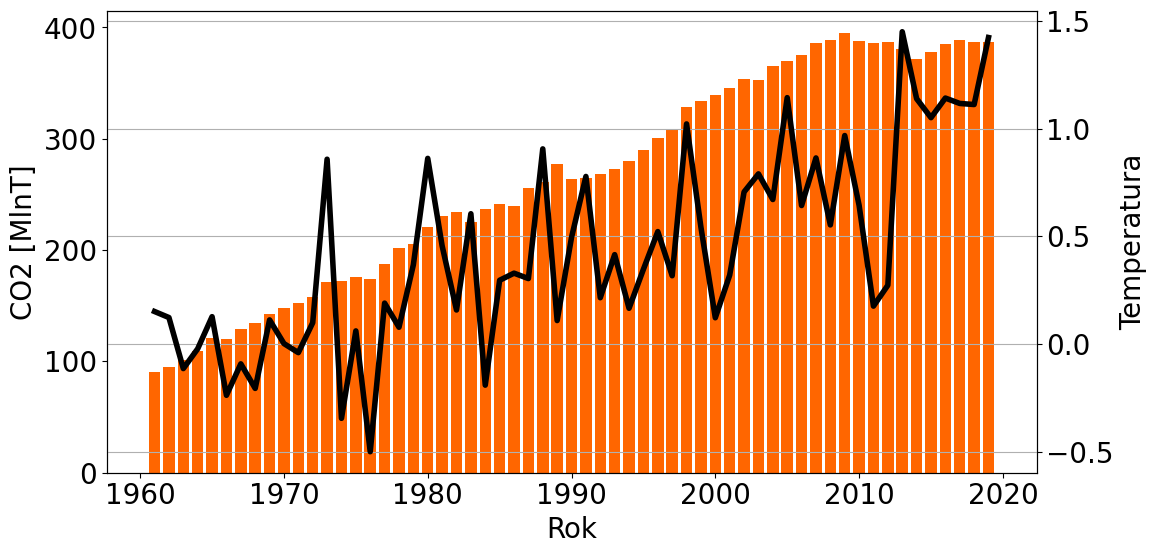

In [36]:
#AUSTRALIA: temperature vs CO2

fig, ax1 = plt.subplots()


ax1.set_xlabel('Rok', fontsize = 20)
ax1.tick_params(axis='x', labelcolor='#000000', labelsize = 20)
ax1.set_ylabel('CO2 [MlnT]', color='#000000', fontsize = 20)  
ax1.bar(Australia_full.Year, Australia_full.CO2, label='Australia', color='#FF6600')
ax1.tick_params(axis='y', labelcolor='#000000', labelsize = 20)

ax2 = ax1.twinx()  

ax2.set_ylabel('Temperatura', color='#000000', fontsize = 20)
ax2.plot(Australia_full.Year, Australia_full.Temp_change,label='Australia', color='#000000', linewidth = 4)
ax2.tick_params(axis='y', labelcolor='#000000', labelsize = 20)

plt.grid(None)

plt.rcParams['figure.figsize'] = [12, 6]

#fig.tight_layout()  
#plt.title('Australia: zmiany temperatury vs emisja CO2 (1961-2019)', fontsize = 20)

plt.show()

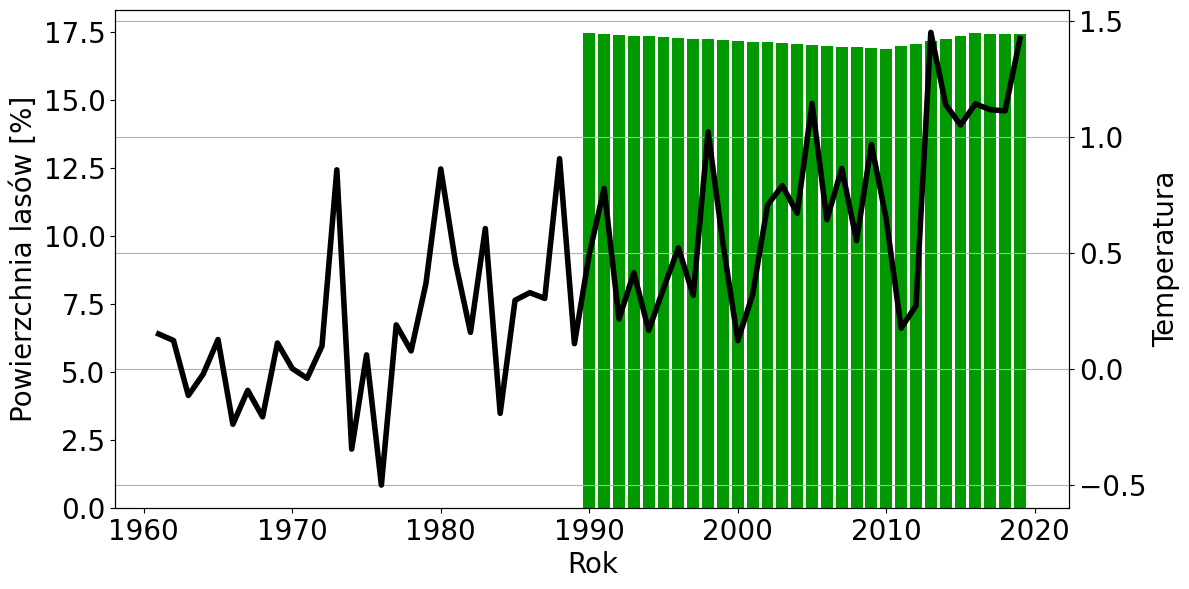

In [37]:
#AUSTRALIA: temperature vs deforestation

fig, ax1 = plt.subplots()


ax1.set_xlabel('Rok', fontsize = 20)
ax1.tick_params(axis='x', labelcolor='#000000', labelsize = 20)
ax1.set_ylabel('Powierzchnia lasów [%]', color='#000000', fontsize = 20)  
ax1.bar(Australia_full.Year, Australia_full.Forest_percent, label='Australia', color='#009900')
ax1.tick_params(axis='y', labelcolor='#000000', labelsize = 20)

ax2 = ax1.twinx()  

ax2.set_ylabel('Temperatura', color='#000000', fontsize = 20)
ax2.plot(Australia_full.Year, Australia_full.Temp_change,label='Australia', color='#000000', linewidth = 4)
ax2.tick_params(axis='y', labelcolor='#000000', labelsize = 20)

plt.grid(None)

plt.rcParams['figure.figsize'] = [12, 6]
fig.tight_layout()  
#plt.title('Australia: zmiany temperatury vs poziom zalesienia (1961-2019)', fontsize = 20)


plt.show()


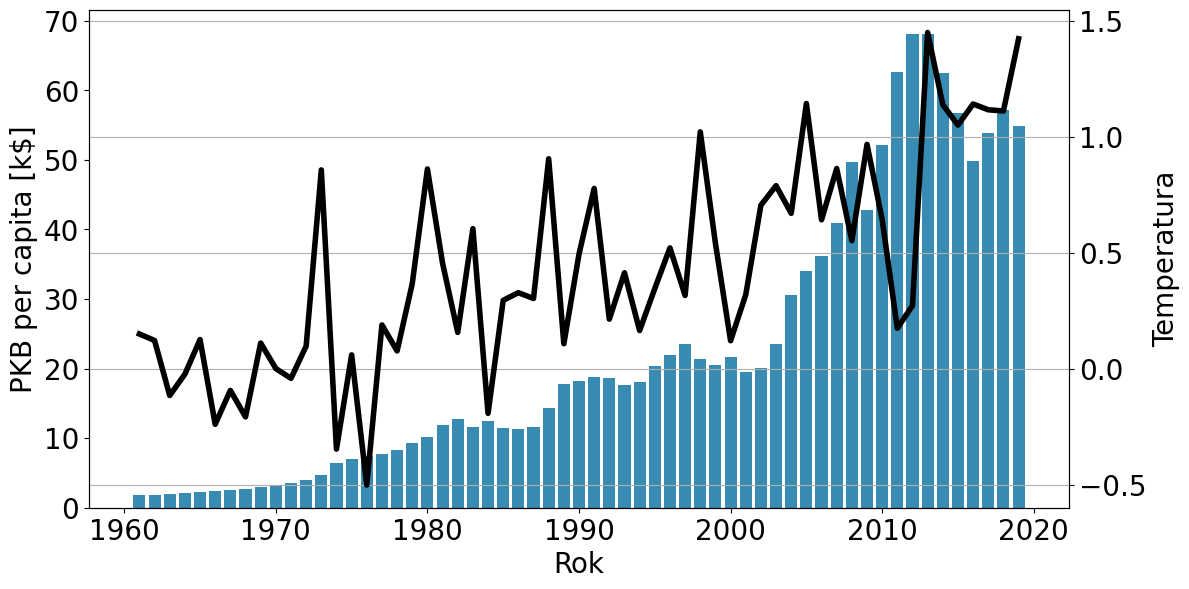

In [40]:
#AUSTRALIA: temperature vs GDP

fig, ax1 = plt.subplots()

ax1.set_xlabel('Rok', fontsize = 20)
ax1.tick_params(axis='x', labelcolor='#000000', labelsize = 20)
ax1.set_ylabel('PKB per capita [k$]', color='#000000', fontsize = 20)  
ax1.bar(Australia_full.Year, Australia_full.GDP_per_capita, label='Australia', color='#388CB2')
ax1.tick_params(axis='y', labelcolor='#000000', labelsize = 20)

ax2 = ax1.twinx()  

ax2.set_ylabel('Temperatura', color='#000000', fontsize = 20)
ax2.plot(Australia_full.Year, Australia_full.Temp_change,label='Australia', color='#000000', linewidth = 4)
ax2.tick_params(axis='y', labelcolor='#000000', labelsize = 20)

plt.grid(None)

plt.rcParams['figure.figsize'] = [12, 6]
fig.tight_layout()  
#plt.title('Australia: zmiany temperatury vs poziom PKB (1961-2019)', fontsize = 20)


plt.show()

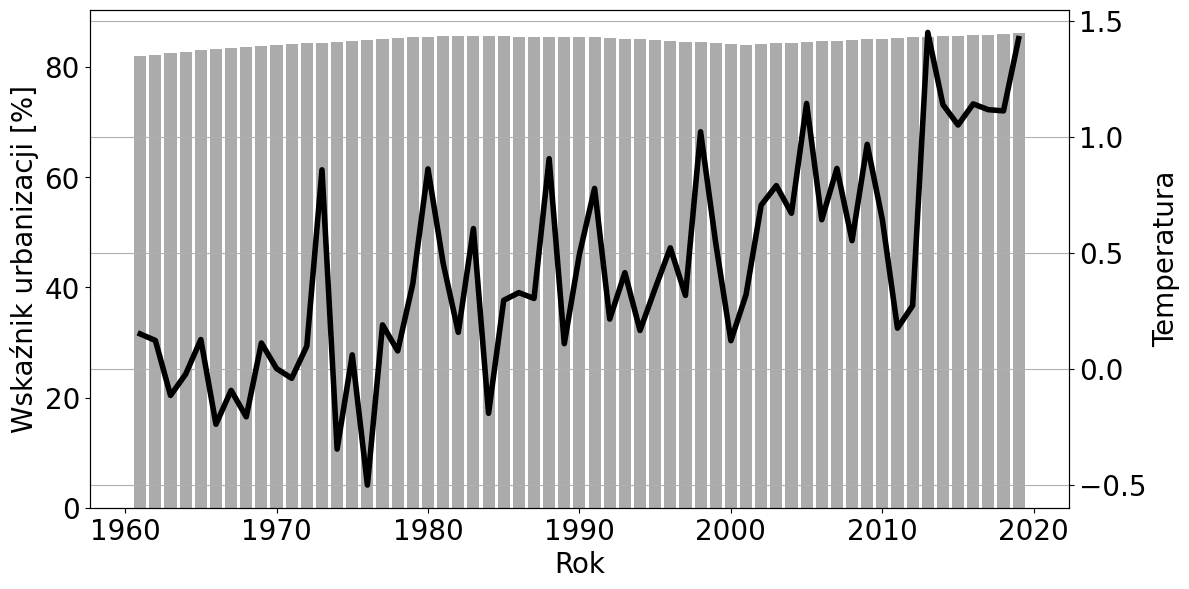

In [39]:
#AUSTRALIA: temperature vs urbanization

fig, ax1 = plt.subplots()

ax1.set_xlabel('Rok', fontsize = 20)
ax1.tick_params(axis='x', labelcolor='#000000', labelsize = 20)
ax1.set_ylabel('Wskaźnik urbanizacji [%]', color='#000000', fontsize = 20)  
ax1.bar(Australia_full.Year, Australia_full.Urbanization_rate, label='Australia', color='#ABABAB')
ax1.tick_params(axis='y', labelcolor='#000000', labelsize = 20)

ax2 = ax1.twinx()  

ax2.set_ylabel('Temperatura', color='#000000', fontsize = 20)
ax2.plot(Australia_full.Year, Australia_full.Temp_change,label='Australia', color='#000000', linewidth = 4)
ax2.tick_params(axis='y', labelcolor='#000000', labelsize = 20)

plt.grid(None)

plt.rcParams['figure.figsize'] = [12, 6]
fig.tight_layout()  
#plt.title('Australia: zmiany temperatury vs poziom zurbanizowania (1961-2019)', fontsize = 20)


plt.show()

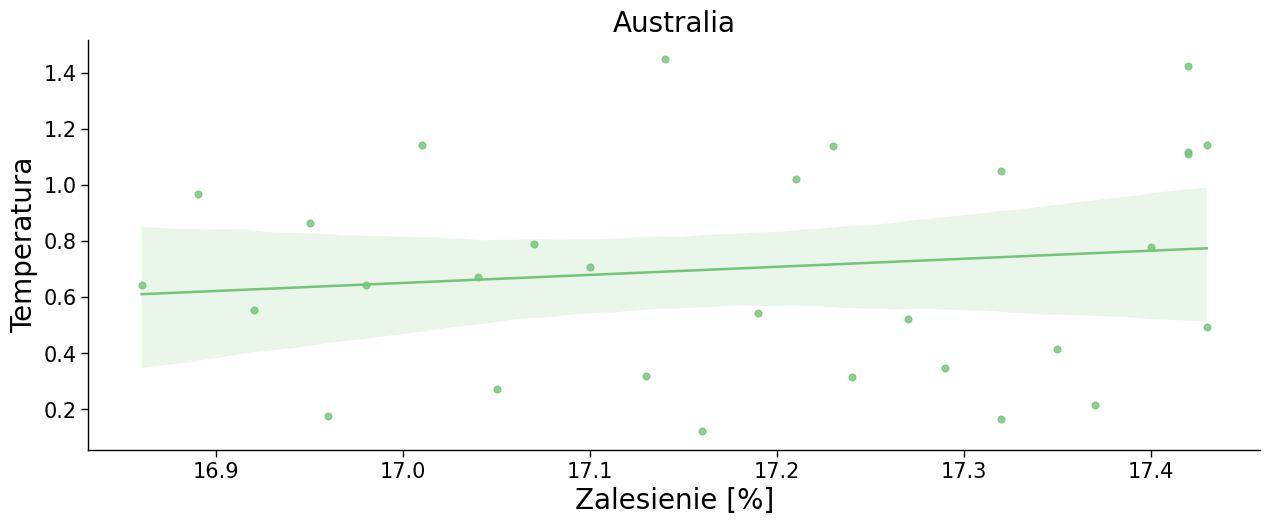

In [50]:
#Regression - Forestation vs temperature
##Australia

sns.set_context('paper')
sns.lmplot(x = 'Forest_percent', y = "Temp_change", data = Australia_full, 
           aspect=2.5, 
           col='Area', 
           hue = 'Area', 
           palette = 'Greens')

plt.xlabel('Zalesienie [%]',fontsize = 20) 
plt.tick_params(axis='x', labelcolor='#000000', labelsize = 15)

plt.ylabel('Temperatura',fontsize = 20) 
plt.tick_params(axis='y', labelcolor='#000000', labelsize = 15)

plt.title('Australia',fontsize = 20)

plt.show()

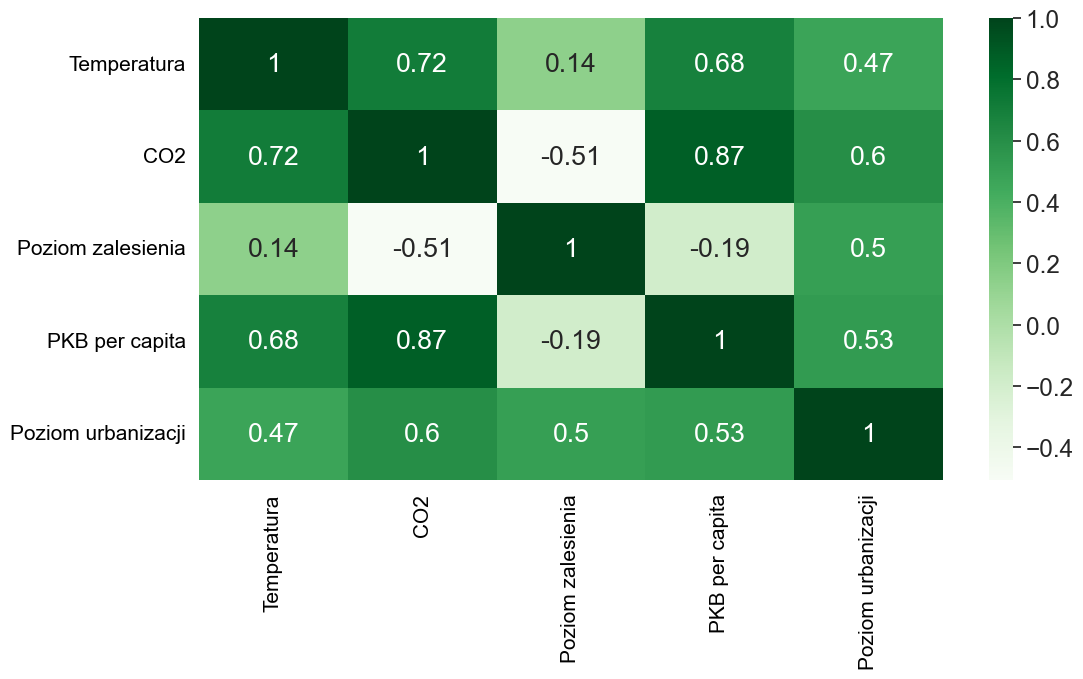

In [61]:
corr_Australia = pd.DataFrame(Australia_full, columns = ['Temp_change' , 'CO2', 'Forest_percent' ,'GDP_per_capita','Urbanization_rate'])

corr_Australia.rename(columns = {'Temp_change' : 'Temperatura', 'CO2': 'CO2', 'Forest_percent' : 'Poziom zalesienia', 
                                  'GDP_per_capita': 'PKB per capita', 'Urbanization_rate': 'Poziom urbanizacji'}, inplace = True)
corr_Australia

corr_Australia = corr_Australia.corr()
sns.heatmap(corr_Australia, annot=True, cmap = 'Greens')
plt.tick_params(axis='x', labelcolor='#000000', labelsize = 15)
plt.tick_params(axis='y', labelcolor='#000000', labelsize = 15)
sns.set(font_scale = 1.6) 
plt.xticks(rotation = 90)

plt.show()
